# Rule based

In [12]:
import pandas as pd
import numpy as np
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset


In [13]:
train = pd.read_csv("new_train.csv")

In [14]:
train.head()

,user_id,isbn,rating,age,location_country,category,publisher,language,book_author
0,8,0002005018,4,3,0,0,0,0,0
1,67544,0002005018,7,3,0,0,0,0,0
2,123629,0002005018,8,3,0,0,0,0,0
3,200273,0002005018,8,3,0,0,0,0,0
4,210926,0002005018,9,3,0,0,0,0,0


## 분석

In [7]:
count=train.groupby("user_id").size()
dfcount = pd.DataFrame(count, columns=["count"])
train=pd.merge(train,dfcount, how='left', on='user_id')


In [8]:
train[train['user_id'].isin(list(dfcount[dfcount['count']>5].index))]


,user_id,isbn,rating,age,location_country,category,publisher,language,book_author,count
0,8,0002005018,4,3,0,0,0,0,0,7
1,67544,0002005018,7,3,0,0,0,0,0,7
5,219008,0002005018,7,6,0,0,0,0,0,26
6,263325,0002005018,5,2,0,0,0,0,0,40
7,2954,0060973129,8,6,1,1,1,0,1,11
...,...,...,...,...,...,...,...,...,...,...
306790,278843,0743525493,7,2,1,5,2171,1,1272,13
306791,278851,067161746X,6,3,1,7,222,0,69,12
306792,278851,0884159221,7,3,1,5,10406,1,54713,12
306793,278851,0912333022,7,3,1,3,6387,0,54714,12


In [9]:
train[train['count']>100]

,user_id,isbn,rating,age,location_country,category,publisher,language,book_author,count
11,197659,0374157065,9,4,1,2,2,0,2,637
13,11676,0399135782,8,3,2,3,3,0,3,5520
15,46398,0399135782,9,3,1,3,3,0,3,262
23,230522,0399135782,7,5,1,3,3,0,3,256
27,52614,0425176428,8,3,1,4,4,0,4,116
...,...,...,...,...,...,...,...,...,...,...
306660,277427,0964420805,6,4,1,5,1880,1,54648,122
306661,277427,0967201519,7,4,1,5,10391,1,54649,122
306662,277427,1568380593,10,4,1,5,1413,1,45942,122
306663,277427,1572302399,10,4,1,12,10392,0,54650,122


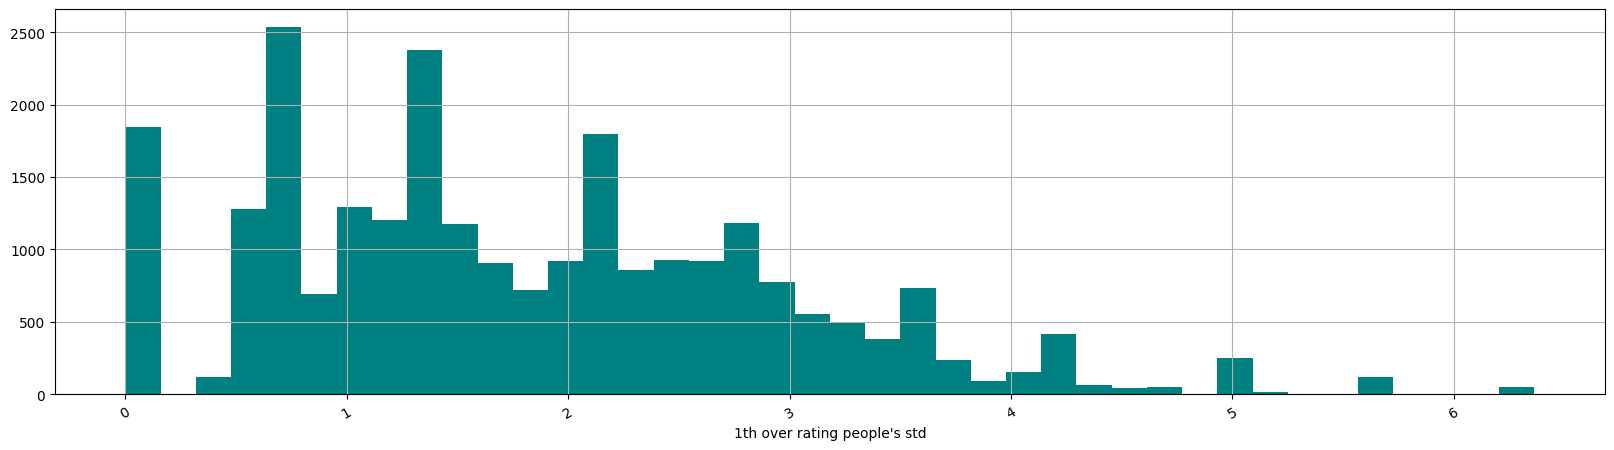

In [10]:
n = 1


plt.figure(figsize=(20,5))
train[train["count"]>n].groupby('user_id')["rating"].std().hist(bins=40, color='teal')
plt.xlabel(f'{n}th over rating people\'s std')
plt.xticks(rotation=30)
plt.show()


## 못봤던 사람 -> 7  / 봤던사람 -> 그사람의 평균

In [11]:

count=train.groupby("user_id").size()
dfcount = pd.DataFrame(count, columns=["count"])
test=pd.merge(test,dfcount, how='left', on='user_id')

test['count'] = test['count'].fillna(0)
test.set_index("user_id",inplace = True)

for row in test.itertuples():
    if row[3] == 0 :
        test.at[row[0],"rating"] = 7
    else:
        test.at[row[0],"rating"] = train[train['user_id']== row[0]]['rating'].mean()

test = test.reset_index()
test = test.drop(['count'], axis=1)



NameError: name 'test' is not defined

## CSV 저장

In [128]:
submission = pd.read_csv( './data/sample_submission.csv')


# test['rating'].head()
submission=pd.concat([submission.drop(['rating'],axis=1),test['rating']],axis=1)
submission.head(10)

,user_id,isbn,rating
0,11676,0002005018,0.0
1,116866,0002005018,0.0
2,152827,0060973129,0.0
3,157969,0374157065,8.0
4,67958,0399135782,0.0
5,213191,0399135782,0.0
6,245827,0399135782,0.0
7,11676,0671870432,0.0
8,263256,1558746218,7.0
9,226745,1881320189,0.0


In [58]:
num = 1
import time

now = time.localtime()
now_date = time.strftime('%Y%m%d', now)
now_hour = time.strftime('%X', now)
save_time = now_date + '_' + now_hour.replace(':', '')
submission.to_csv('submit/{}_rule_based_{}.csv'.format(save_time,num), index=False)


# 기존 파일에 적용

In [134]:
# submission = pd.read_csv('./data/sample_submission.csv')
submission = pd.read_csv('./submit/기존파일.csv')
train = pd.read_csv('./data/train_ratings.csv')

count=train.groupby("user_id").size()
dfcount = pd.DataFrame(count, columns=["count"])

train=pd.merge(train,dfcount, how='left', on='user_id')
submission=pd.merge(submission,dfcount, how='left', on='user_id')
submission['count'] = submission['count'].fillna(0)
submission.set_index("user_id",inplace = True)

for row in submission.itertuples():
    if row[3] == 0 :
        submission.at[row[0],"rating"] = 7
    else:
        if train[train['user_id']== row[0]]['count'].mean() >5 :            #5명 이상이 rating 매긴 user_id
            if train[train['user_id']== row[0]]['rating'].std() < 1:        #각자 매긴 rating 의 표준편차가 1 이하인 사람에게만 적용
                submission.at[row[0],"rating"] = train[train['user_id']== row[0]]['rating'].mean()



submission = submission.reset_index()
submission = submission.drop(['count'], axis=1)


In [112]:
train[train['user_id']== 219008]['rating'].std()
# train.head(10)

1.6138820851026834

In [135]:
submission.head(10)

,user_id,isbn,rating
0,11676,0002005018,8.220166
1,116866,0002005018,9.643744
2,152827,0060973129,9.590261
3,157969,0374157065,8.000000
4,67958,0399135782,10.376624
5,213191,0399135782,6.144351
6,245827,0399135782,5.271151
7,11676,0671870432,6.633573
8,263256,1558746218,7.000000
9,226745,1881320189,8.492176


In [147]:
num = 2

now = time.localtime()
now_date = time.strftime('%Y%m%d', now)
now_hour = time.strftime('%X', now)
save_time = now_date + '_' + now_hour.replace(':', '')
submission.to_csv('submit/{}_rule_based_{}.csv'.format(save_time,num), index=False)